In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train,y_train) , (X_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
print(len(y_train))
print(len(y_test))

60000
10000


In [6]:
X_train[1].shape

(28, 28)

In [7]:
X_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

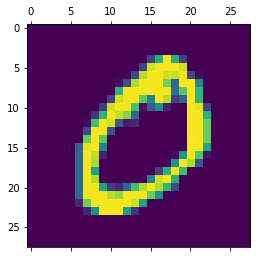

In [8]:
plt.matshow(X_train[1])

In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
X_train=X_train/255
X_test=X_test/255

In [11]:
X_train_flat= X_train.reshape(len(X_train),28*28)
X_train_flat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
X_train_flat.shape

(60000, 784)

In [13]:
X_train_flat[1]           # flattened to 1d array

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [14]:
X_test_flat= X_test.reshape(len(X_test),28*28)
X_test_flat.shape

(10000, 784)

In [15]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape= (784,),activation='sigmoid')
])

In [16]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [17]:
model.fit(X_train_flat,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4722 - accuracy: 0.8765
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3042 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2839 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2738 - accuracy: 0.9244
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2669 - accuracy: 0.9259


In [18]:
model.evaluate(X_test_flat,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2669 - accuracy: 0.9255


[0.26691871881484985, 0.9254999756813049]

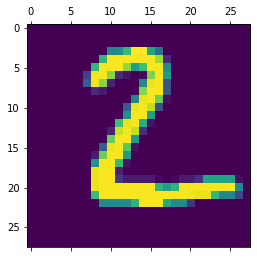

In [19]:
plt.matshow(X_test[1])

In [20]:
y_pred= model.predict(X_test_flat)

In [21]:
y_pred[1]

array([3.23027223e-01, 3.44261923e-03, 9.99261916e-01, 3.79306257e-01,
       5.75396952e-10, 7.72306502e-01, 8.69900703e-01, 4.69106253e-13,
       1.09821185e-01, 2.16067209e-09], dtype=float32)

In [22]:
np.argmax(y_pred[1])

2

In [23]:
y_pred_labels= [np.argmax(i) for i in y_pred]
y_pred_labels[1]

2

In [24]:
conf_matrix= tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
conf_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    2,    2,    0,    5,    6,    2,    1,    1],
       [   0, 1113,    3,    2,    0,    1,    4,    2,   10,    0],
       [   5,    9,  924,   16,   10,    6,   13,   11,   35,    3],
       [   3,    0,   18,  920,    1,   30,    2,   11,   17,    8],
       [   2,    1,    3,    1,  921,    0,   10,    3,    7,   34],
       [   7,    2,    3,   22,   10,  794,   15,    4,   28,    7],
       [  11,    3,    7,    1,    8,   13,  912,    2,    1,    0],
       [   1,    5,   22,    6,   10,    1,    0,  943,    3,   37],
       [   6,    8,    6,   27,    9,   37,    9,   11,  848,   13],
       [  11,    7,    1,   10,   30,    9,    0,   18,    4,  919]])>

In [25]:
import seaborn as sn

Text(114.0, 0.5, 'truth')

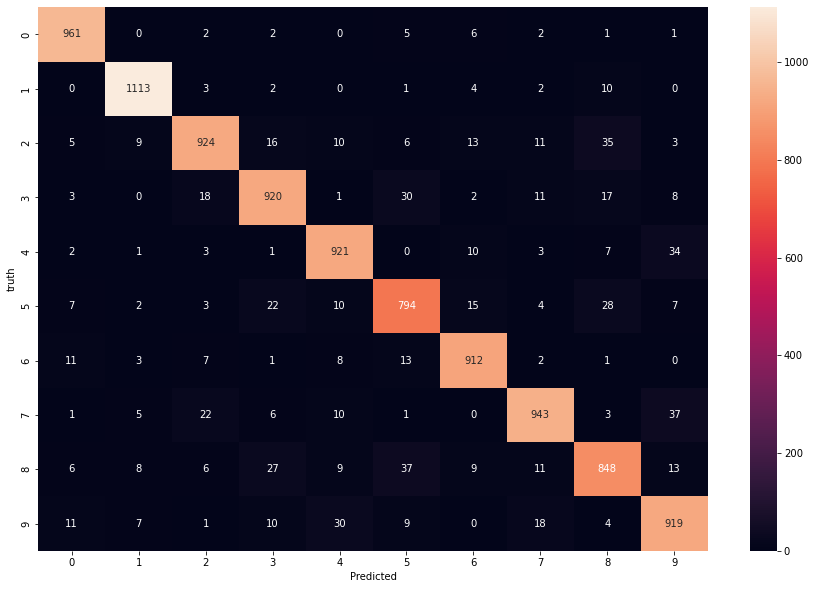

In [26]:
plt.figure(figsize=(15,10))
sn.heatmap(conf_matrix, annot=True, fmt= 'd')
plt.xlabel('Predicted')
plt.ylabel('truth')

In [27]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape= (784,),activation='relu'),         #hidden layer added
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flat,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2695 - accuracy: 0.9233
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1231 - accuracy: 0.9641
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0865 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0654 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0513 - accuracy: 0.9839


In [28]:
model.evaluate(X_test_flat,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0819 - accuracy: 0.9754


[0.08190728724002838, 0.9753999710083008]

In [29]:
conf_matrix= tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
conf_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    2,    2,    0,    5,    6,    2,    1,    1],
       [   0, 1113,    3,    2,    0,    1,    4,    2,   10,    0],
       [   5,    9,  924,   16,   10,    6,   13,   11,   35,    3],
       [   3,    0,   18,  920,    1,   30,    2,   11,   17,    8],
       [   2,    1,    3,    1,  921,    0,   10,    3,    7,   34],
       [   7,    2,    3,   22,   10,  794,   15,    4,   28,    7],
       [  11,    3,    7,    1,    8,   13,  912,    2,    1,    0],
       [   1,    5,   22,    6,   10,    1,    0,  943,    3,   37],
       [   6,    8,    6,   27,    9,   37,    9,   11,  848,   13],
       [  11,    7,    1,   10,   30,    9,    0,   18,    4,  919]])>

Text(114.0, 0.5, 'truth')

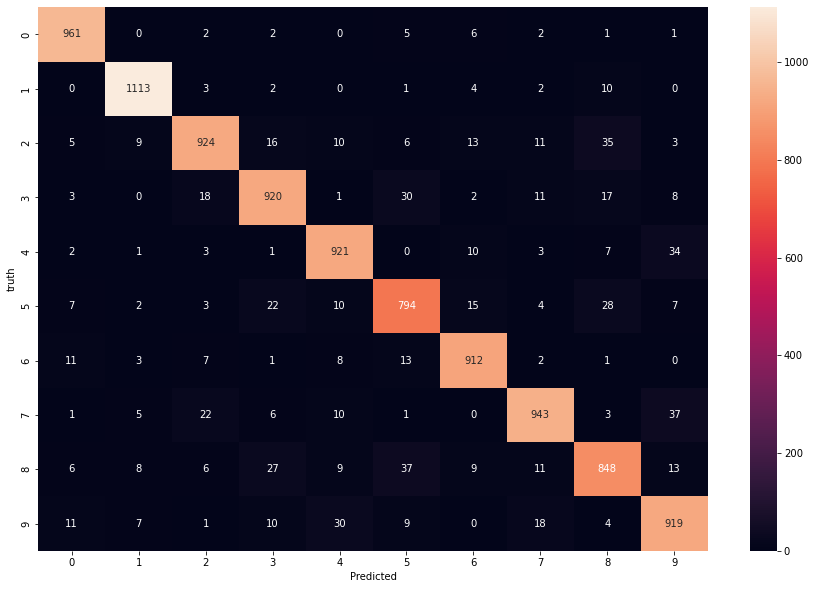

In [30]:
plt.figure(figsize=(15,10))
sn.heatmap(conf_matrix, annot=True, fmt= 'd')
plt.xlabel('Predicted')
plt.ylabel('truth')

In [31]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, input_shape= (784,),activation='relu'),         #hidden layer added
    keras.layers.Dense(10,activation='sigmoid')
])

tb_callbacks = tf.keras.callbacks.TensorBoard(log_dir='logs/adam', histogram_freq=1 )

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train,y_train,epochs=5,callbacks=[tb_callbacks])

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2737 - accuracy: 0.9230
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1212 - accuracy: 0.9646
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0856 - accuracy: 0.9745
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0657 - accuracy: 0.9810
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0525 - accuracy: 0.9835


In [32]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, input_shape= (784,),activation='relu'),         #hidden layer added
    keras.layers.Dense(10,activation='sigmoid')
])

tb_callbacks = tf.keras.callbacks.TensorBoard(log_dir='logs/sgd', histogram_freq=1 )

model.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train,y_train,epochs=5,callbacks=[tb_callbacks])

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6633 - accuracy: 0.8296
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3412 - accuracy: 0.9045
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2910 - accuracy: 0.9185
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2608 - accuracy: 0.9267
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2385 - accuracy: 0.9330


In [33]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [35]:
def get_model():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28,28)),
        keras.layers.Dense(100, input_shape= (784,),activation='relu'),         #hidden layer added
        keras.layers.Dense(10,activation='sigmoid')
    ])

# tb_callbacks = tf.keras.callbacks.TensorBoard(log_dir='logs/adam', histogram_freq=1 )

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# model.fit(X_train,y_train,epochs=5,callbacks=[tb_callbacks])


In [40]:
%%timeit -n1 -r1 
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2741 - accuracy: 0.9230
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1253 - accuracy: 0.9632
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0881 - accuracy: 0.9736
13.1 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [41]:
%%timeit -n1 -r1
with tf.device('GPU:0'):
    gpu_model = get_model()
    gpu_model.fit(X_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2753 - accuracy: 0.9216
Epoch 2/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1252 - accuracy: 0.9636
Epoch 3/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0870 - accuracy: 0.9736
26.6 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [42]:
tf.test.is_gpu_available(
    cuda_only=False, min_cuda_compute_capability=None
)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [43]:
tf.test.is_built_with_cuda()

True

In [44]:
# class MyTest(tf.test.TestCase):

#   def test_add_on_gpu(self):
#     if not tf.test.is_built_with_cuda():
#       self.skipTest("test is only applicable on GPU")

#     with tf.device("GPU:0"):
#       self.assertEqual(tf.math.add(1.0, 2.0), 3.0)

In [45]:
tf.test.is_built_with_cuda()

True

In [46]:
gpu_available = tf.test.is_gpu_available()
is_cuda_gpu_available = tf.test.is_gpu_available(cuda_only=True)
is_cuda_gpu_min_3 = tf.test.is_gpu_available(True, (3,0))

In [47]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1
